<a href="https://colab.research.google.com/github/eadamsRU/GIS_RU/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify


In [52]:

import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [53]:

#!python --version
gpd.__version__

'1.0.1'

#This gets our NJ county shapefile

In [54]:
! wget -q -O nj-counties.zip https://github.com/eadamsRU/GIS_RU/raw/main/NJ_Counties_3424_-858053776543216328.zip

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('NJ_Counties_3424.shp') #load the shapefile with gpd as njC

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:196: RuntimeWarning: NJ_Counties_3424.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [55]:
njC0.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2020,int64


In [56]:

njC0.dtypes #with geopandas can do stuff like with pandas :)
#njC0.info()

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2020,int64


#This gets our datasets


In [ ]:
#! wget -q -O DietExercise.zip https://github.com/eadamsRU/GIS_RU/raw/main/NJ%20county%20Diet%20and%20Exercise.xlsx

#zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
#njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [ ]:
#! wget -q -O FoodIndex.zip https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/NJ%20county%20Food%20Index%20Formatted.xlsx


## Read in dataframes


In [57]:
foodIndex = pd.read_excel('https://github.com/eadamsRU/GIS_RU/raw/main/NJ%20county%20Food%20Index%20Formatted.xlsx')


In [58]:

foodIndex.dtypes

,0
County,object
Food Environment Index,int64


In [59]:
dietExerciseIndex = pd.read_excel('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/Diet%20and%20Exercise%20Formatted%202.xlsx')


In [60]:
dietExerciseIndex.dtypes

,0
County,object
Healthy Food,float64
Exercise Opportunities,float64
Obese Persons,float64
Physically Inactive Persons,float64
Children Eligible for Free Lunch,float64


In [61]:
dietExerciseIndex.head(3)

,County,Healthy Food,Exercise Opportunities,Obese Persons,Physically Inactive Persons,Children Eligible for Free Lunch
0,Atlantic County,7.8,93.1,32.4,22.5,53.1
1,Bergen County,0.9,99.5,22.9,18.2,19.0
2,Burlington County,5.0,93.0,30.0,18.4,24.7


Format and rename columns on COUNTY to match for merge

In [62]:
foodIndex.rename(columns={'County': 'COUNTY'}, inplace=True)


In [63]:
dietExerciseIndex.rename(columns={'County': 'COUNTY'}, inplace=True)

# MERGE

In [ ]:
#merge
#njC1 = pd.merge(njC0, foodIndex, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)

#njC1[['COUNTY','dec2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

In [ ]:
#njC1.head(1)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2020,...,POP1980,POPDEN2020,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,geometry,Food Environment Index,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390813.840968,610.646627,274534.0,...,204615.0,450.0,450.0,414.0,451.0,335.0,COASTAL,"POLYGON ((443056.01 311529.77, 443044.77 31153...",NaN,left_only


In [ ]:
#njC1.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2020,float64


## I did the merge for the foodindex, however there is just one variable, outside of county variable

In [64]:
njC2 = pd.merge(njC0, dietExerciseIndex, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)


In [65]:
njC2.head(1)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2020,...,POPDEN1990,POPDEN1980,REGION,geometry,Healthy Food,Exercise Opportunities,Obese Persons,Physically Inactive Persons,Children Eligible for Free Lunch,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390813.840968,610.646627,274534.0,...,451.0,335.0,COASTAL,"POLYGON ((443056.01 311529.77, 443044.77 31153...",NaN,NaN,NaN,NaN,NaN,left_only


In [66]:
njC2.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2020,float64


# Plot

<Axes: >

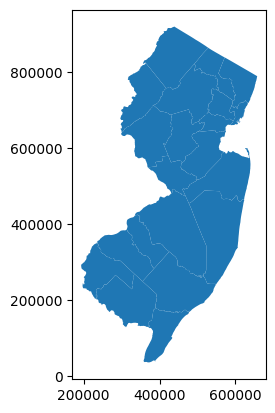

In [67]:
njC2.plot()


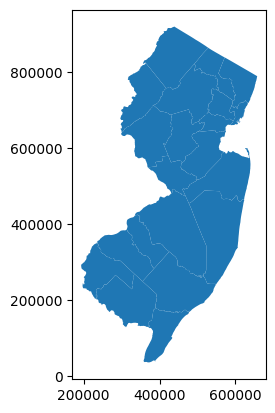

In [68]:
# Simple plot of the geometries in njC2
ax = njC2.plot()  # No need to specify a column, this will just plot the shapes
plt.show()

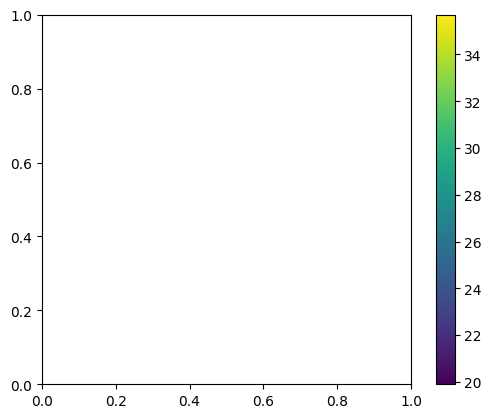

In [69]:
# Simple plot showing 'Obese Persons' column with default settings
ax = njC2.plot(column='Obese Persons', legend=True)
plt.show()

# Let us edit this below

We can update where we see 'POPDEN2010' to whatever other column you joined on

In [ ]:
#njC2['Obese Persons'] = pd.to_numeric(njC2['Obese Persons'], errors='coerce')  # Ensure numeric values

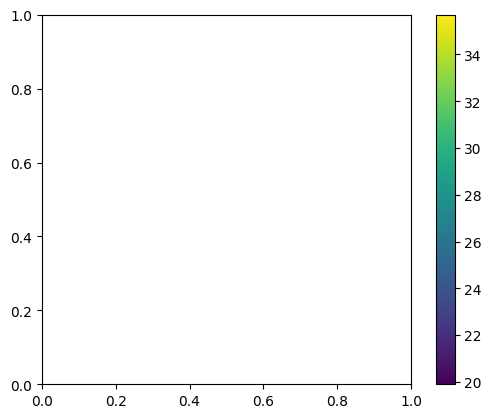

In [ ]:
#ax = njC2.plot(column='Obese Persons', legend=True)
#plt.show()

In [ ]:
#print(njC2.geometry.is_valid)  # Check if geometries are valid
#print(njC2.geometry.is_empty)  # Check if geometries are empty

In [ ]:
#njC2 = njC2[njC2.geometry.is_valid & ~njC2.geometry.is_empty]  # Keep only valid, non-empty geometries


In [ ]:
#print(njC2.crs)  # Check the current CRS


EPSG:3424


In [ ]:
# Example: Set CRS to WGS84 (commonly used for geographic data)
#njC2 = njC2.set_crs('EPSG:4326', allow_override=True)

In [ ]:
#ax = njC2.plot(column='Obese Persons', legend=True)
#plt.show()

In [ ]:
#print(njC2['Obese Persons'].describe())  # Check the data in the column


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Obese Persons, dtype: float64


This should create the map below

Text(0.5, 1.0, 'Obese Persons')

[]

[]

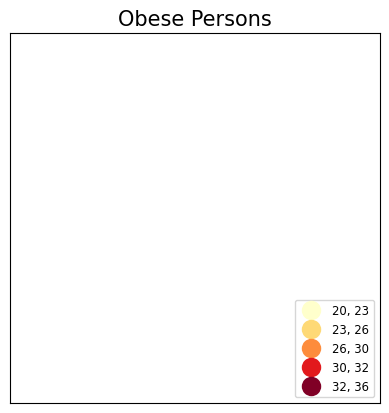

In [ ]:
# Create the plot
ax = njC2.plot(column='Obese Persons', cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=2, legend=True,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
# Set title
ax.set_title("Obese Persons", fontsize=15)

# Remove x and y ticks if you want to clean up the plot further
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

# Making the map

<Axes: >

[]

[]

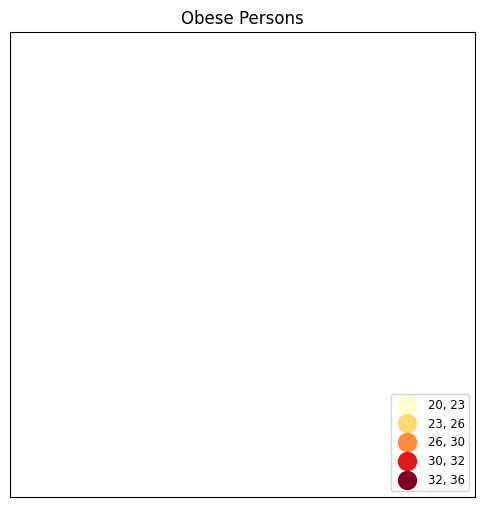

In [ ]:
#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='Obese Persons',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Obese Persons")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as